In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
zoo = fetch_ucirepo(id=111) 
  
# data (as pandas dataframes) 
X = zoo.data.features 
y = zoo.data.targets 
  
# metadata 
print(zoo.metadata) 
  
# variable information 
print(zoo.variables) 

{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

In [2]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [3]:
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#mertics
from sklearn.metrics import f1_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [6]:
# train, test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
 # Random forest
 rf_model = RandomForestClassifier(n_estimators=100, criterion="entropy")
 rf_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy')

In [8]:
# prediction
y_pred = rf_model.predict(X_test)

In [9]:
y_pred[0:5]

array([1, 1, 1, 1, 1])

In [10]:
y_test[0:5]

,type
84,1
55,1
66,1
67,1
45,1


In [11]:
 # evaluate the model
 rf_accuracy = print(round(accuracy_score(y_test, y_pred) * 100, 2))
 rf_accuracy

95.24


In [12]:
le = LabelEncoder()

In [14]:
# Xgboost Classifier
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train_econder)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
# prediction
y_pred = xgboost_model.predict(X_test)

In [16]:
 # evaluate the model
 xgb_accuracy = print(round(accuracy_score(y_test_enconder, y_pred) * 100, 2))
 xgb_accuracy

95.24


In [17]:
model = {"Random Forest":95.24, "Xgb_Boost":95.24}

In [18]:
model_df = pd.DataFrame({"Model": model.keys(), "Scores": model.values()})
model_df

,Model,Scores
0,Random Forest,95.24
1,Xgb_Boost,95.24


C:\Users\USER\AppData\Local\Temp\ipykernel_7384\906193286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= model_df["Model"], y= model_df["Scores"],  palette="viridis", width=0.5)


<Axes: xlabel='Model', ylabel='Scores'>

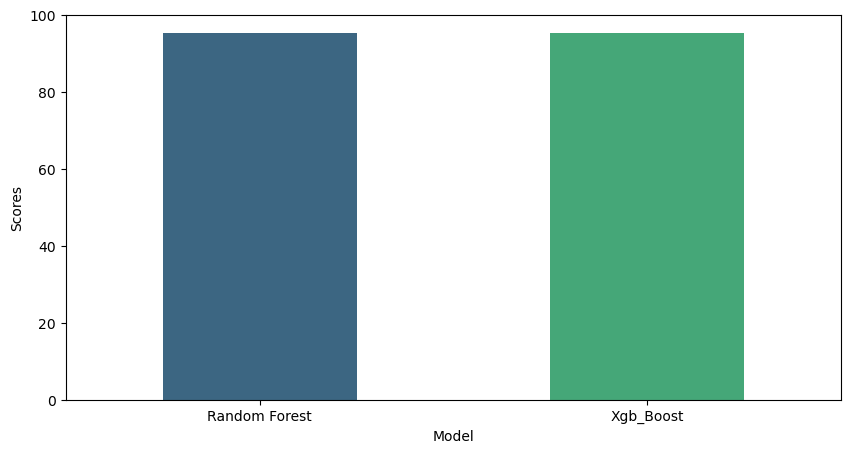

In [19]:
# Visualize the model performance
plt.figure(figsize= (10,5))
sns.barplot(x= model_df["Model"], y= model_df["Scores"],  palette="viridis", width=0.5)